<a href="https://colab.research.google.com/github/Piyush762889/streamlit-crop-app/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
import pandas as pd

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
rice = df['label'] == 'rice'

In [ ]:
rice.value_counts()

False    2100
True      100
Name: label, dtype: int64

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import seaborn as sns

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [ ]:
rainfalldata = df[['rainfall','label', 'temperature']]

In [ ]:
rainfalldata

,rainfall,label,temperature
0,202.935536,rice,20.879744
1,226.655537,rice,21.770462
2,263.964248,rice,23.004459
3,242.864034,rice,26.491096
4,262.717340,rice,20.130175
...,...,...,...
2195,177.774507,coffee,26.774637
2196,127.924610,coffee,27.417112
2197,173.322839,coffee,24.131797
2198,127.175293,coffee,26.272418


In [ ]:
from plotnine import *

%matplotlib inline

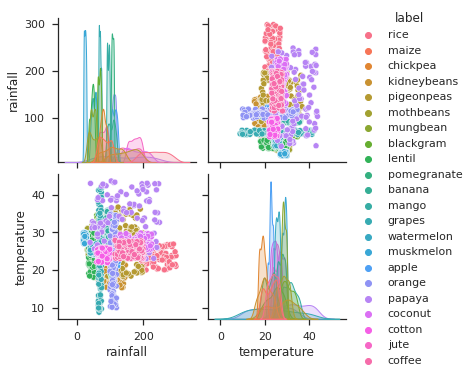

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(rainfalldata, hue="label")

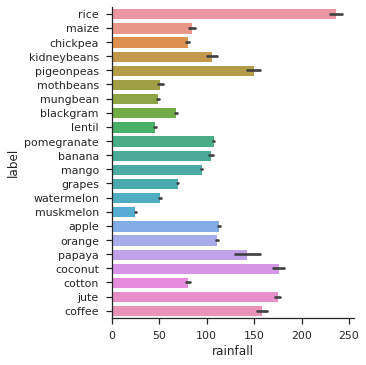

In [ ]:


sns.catplot(x="rainfall", y="label", kind="bar", data=rainfalldata)


In [ ]:
soil = df[['N','P','K','label']]

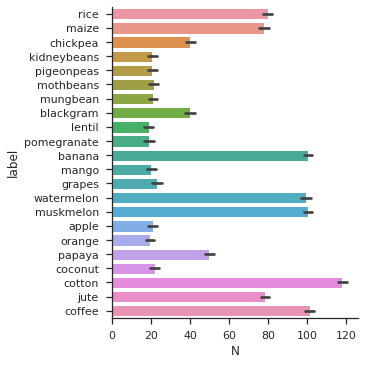

In [ ]:
sns.catplot(x="N", y="label", kind="bar", data=soil)


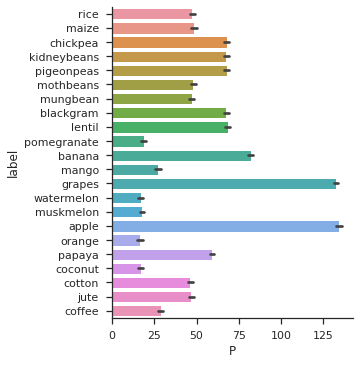

In [ ]:
sns.catplot(x="P", y="label", kind="bar", data=soil)

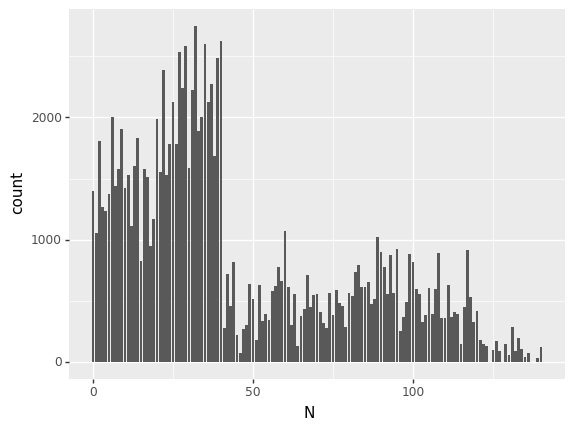

<ggplot: (8752695827861)>

In [ ]:
ggplot(aes(x="N", weight="P"), soil) + geom_bar()

In [ ]:
rainfall

0       202.935536
1       226.655537
2       263.964248
3       242.864034
4       262.717340
           ...    
2195    177.774507
2196    127.924610
2197    173.322839
2198    127.175293
2199    140.937041
Name: rainfall, Length: 2200, dtype: float64

In [ ]:
rainfall 

0       202.935536
1       226.655537
2       263.964248
3       242.864034
4       262.717340
           ...    
2195    177.774507
2196    127.924610
2197    173.322839
2198    127.175293
2199    140.937041
Name: rainfall, Length: 2200, dtype: float64